<a href="https://colab.research.google.com/github/yeabwang/tensorflow/blob/main/Transformers_explained_resource.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transformers

Before transformers, we are using RNN which tries to compute and pass the important information across the chain of the model network sequentially. This caused sveral issues including:

1. Parallelization

* RNNs and LSTMs: These models process sequences of data one step at a time, which means computations are sequential. This makes them slow to train because they cannot fully take advantage of modern hardware like GPUs and TPUs, which are optimized for parallel computation.

* Transformers: They process entire sequences in parallel, meaning they can compute the attention for all tokens at once. This makes them much faster to train and more efficient, especially when training on large datasets.

2. Long-Range Dependencies
* RNNs/LSTMs: While LSTMs mitigate some of the vanishing gradient issues of traditional RNNs, they still struggle with very long-range dependencies. For example, an LSTM might find it difficult to retain information from earlier in a long text or sequence.

* Transformers: With the self-attention mechanism, transformers can directly connect any token with any other token in a sequence, allowing them to capture long-range dependencies effectively. This is particularly useful in tasks like machine translation or document summarization, where context from different parts of the input is crucial for making correct predictions.


3. Flexibility with Input Sequence Length
* RNNs/LSTMs: These models are often constrained by sequence length. They need to iterate over the entire sequence and can lose information over long inputs.

* Transformers: By using self-attention, transformers treat the entire sequence as a whole and can focus on the most relevant parts of the input regardless of its length. Positional encoding is used to help the model understand the order of tokens, but it can still effectively handle long sequences and capture relationships over large contexts.

4. Efficiency with Large Datasets
* RNNs: RNNs struggle with training on very large datasets because of their sequential nature. They require backpropagation through many time steps, which can become computationally expensive and slow.

* Transformers: Transformers scale better with large datasets because their architecture enables parallelization and reduces the amount of sequential computation. For example, models like GPT-3 have been trained on hundreds of billions of parameters, something that would be very difficult with RNNs or LSTMs.

5. Attention Mechanism
* RNNs/LSTMs: These models capture dependencies by passing information step by step through hidden states. This can result in information being diluted or forgotten across long sequences, especially when trying to retain distant context.

* Transformers: The self-attention mechanism in transformers allows each token to attend to every other token in the sequence, giving the model a flexible and dynamic way to focus on different parts of the input. This results in better context understanding, especially in tasks like language modeling or machine translation.

6. Robustness to Different Tasks
* RNNs/LSTMs: RNNs and LSTMs are primarily designed for sequential data, which limits their applicability to certain tasks like image classification or reinforcement learning without extensive modifications.

* Transformers: Transformers are task-agnostic and can be adapted to a wide range of domains beyond NLP, including vision (Vision Transformers), speech, graph-based tasks, and more. This makes them more versatile and applicable across various use cases.

7. Handling Complex Dependencies
* RNNs/LSTMs: Even though LSTMs can capture complex relationships to some extent, they can still have trouble handling highly intricate dependencies, especially when the relationships span long distances within a sequence.

* Transformers: Transformers excel at modeling complex and nuanced relationships because the self-attention mechanism considers every possible relationship between tokens, not just the ones close to each other. This makes them particularly effective in domains that require sophisticated pattern recognition, like language understanding or image captioning.

8. Pre-trained Models and Transfer Learning
* RNNs/LSTMs: While transfer learning is possible with RNNs, the process is more cumbersome and less effective compared to transformers.

* Transformers: Models like BERT and GPT have popularized pre-training on large, unlabeled datasets followed by fine-tuning on smaller, task-specific datasets. This transfer learning paradigm allows transformers to leverage large-scale data efficiently and achieve state-of-the-art results on a variety of tasks with minimal task-specific data.

9. Interpretability
* RNNs/LSTMs: Understanding the internal decision-making process of RNNs can be challenging because they operate in a sequential, hidden-state-based manner. It’s difficult to see how each input is being weighed at different points in the sequence.

* Transformers: Thanks to the self-attention mechanism, transformers offer a clearer understanding of which parts of the input the model is focusing on at any given time. Attention maps can be visualized, allowing for better interpretability and insights into the model's decision-making process.



## How Does RNN works??

The key idea behind an RNN is that it processes inputs sequentially and passes the information from one time step to the next. At each time step, the RNN updates its hidden state (memory) based on the current input and the previous hidden state. This hidden state captures the temporal dependencies in the data.

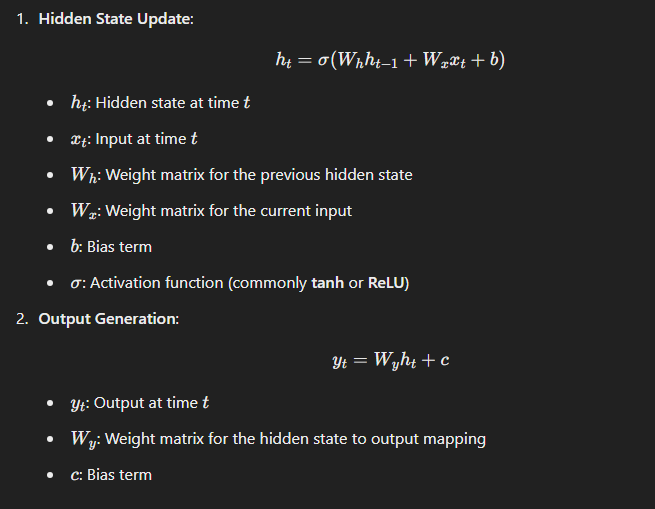


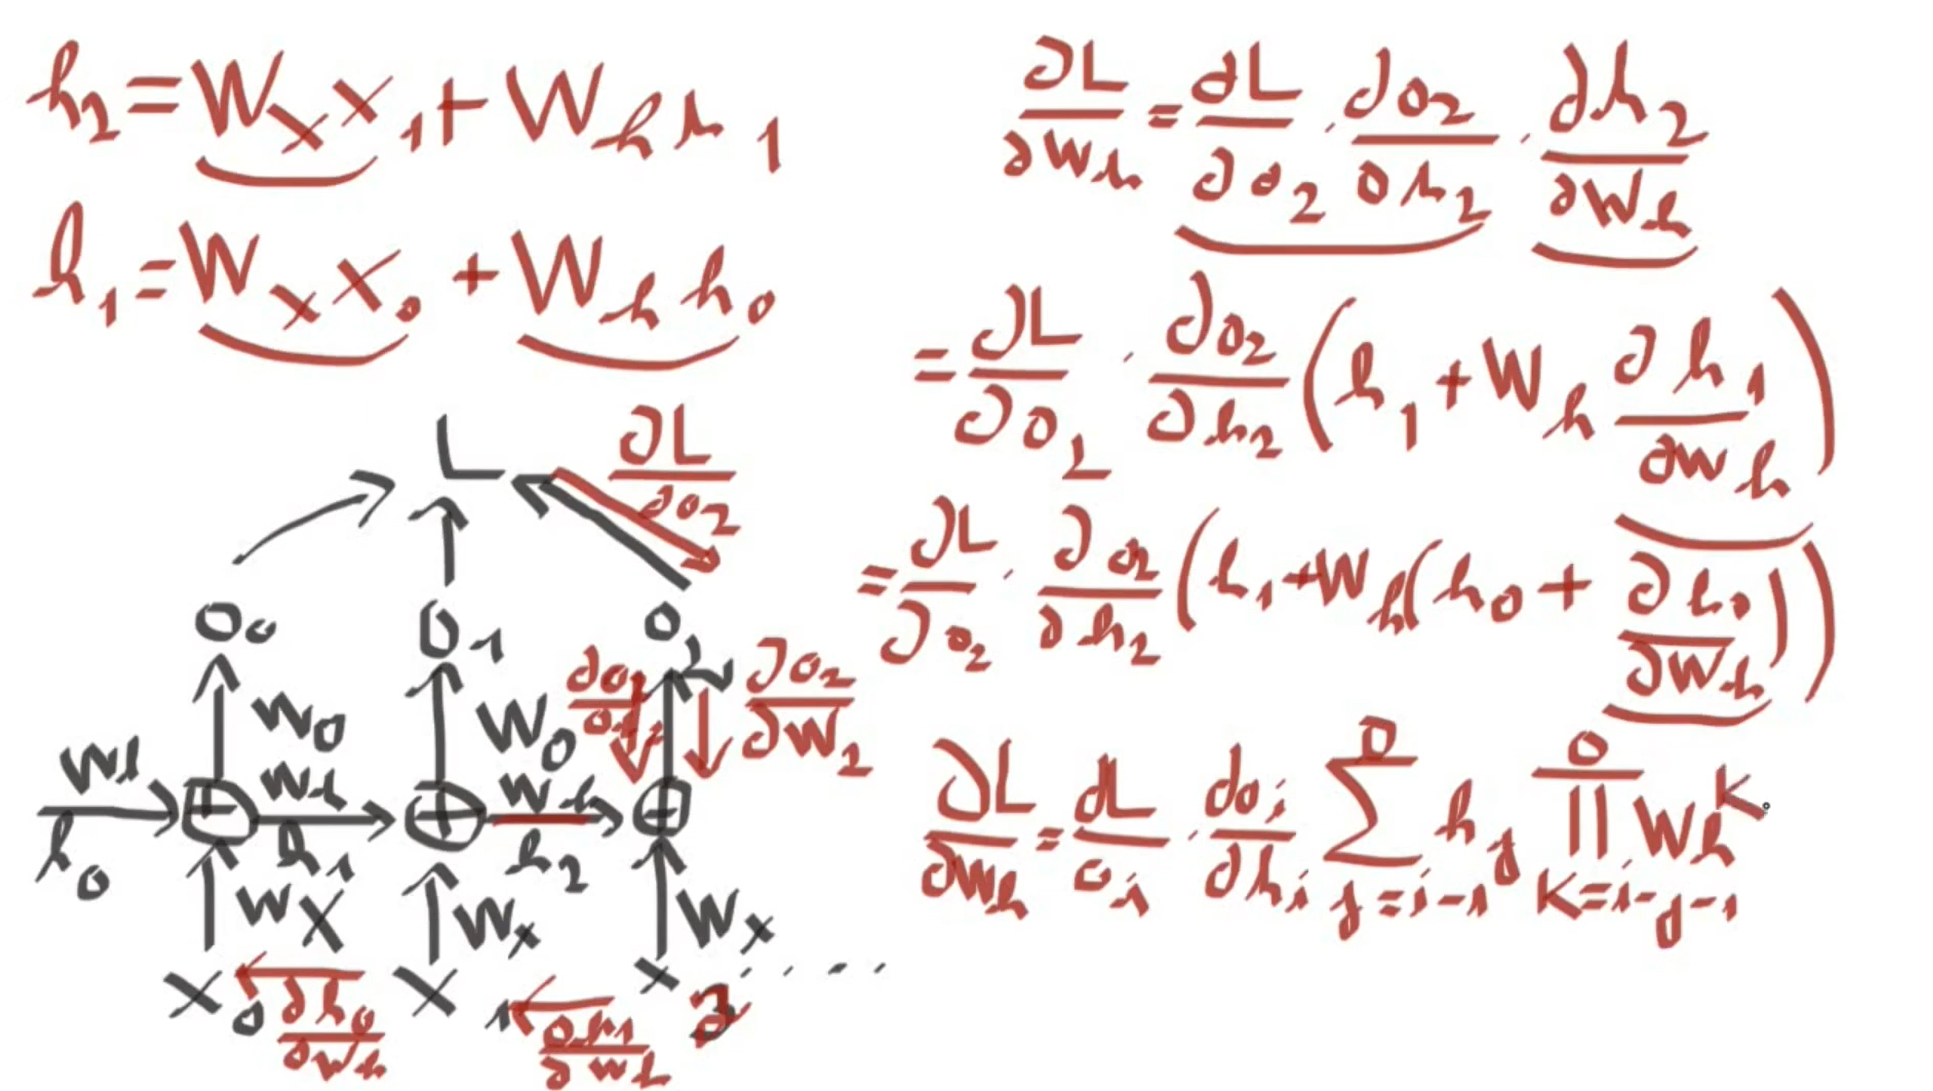


##LSTM

Since the RNN is dependent on the unfolding of previous layers, each time the new layer unfolds(having same weights) we are creating one step closer to having vanishing gradient and exploding gradient.

An LSTM unit consists of several gates that control the flow of information through the network. These gates allow the LSTM to decide which information to keep, forget, or use at each time step. The key gates are:

1. Forget Gate:
Decides what information from the previous hidden state should be discarded. It looks at the current input
𝑥
𝑡
x
t
​
  and the previous hidden state
ℎ
𝑡
−
1
h
t−1
​
 , and produces a value between 0 and 1 for each number in the cell state. A value of 0 means "completely forget," and a value of 1 means "completely keep."

2. Input Gate:
Decides what new information will be stored in the cell state. It has two parts:

* A sigmoid layer that decides which values to update.
* A tanh layer that creates a vector of new candidate values
𝐶
~
𝑡
C
~
  t
​
 , which can be added to the cell state.


3. Cell State Update:
The cell state
𝐶
𝑡
C
t
​
  is updated by combining the previous cell state
𝐶
𝑡
−
1
C
t−1
​
  and the new candidate values
𝐶
~
𝑡
C
~
  t
​
 , weighted by the output of the input gate and the forget gate.


4. Output Gate:
Decides what the next hidden state
ℎ
𝑡
h
t
​
  should be. The hidden state will be used in the next time step and also to generate the output of the LSTM unit at this time step. The output gate controls what part of the cell state should be output at the current time step.


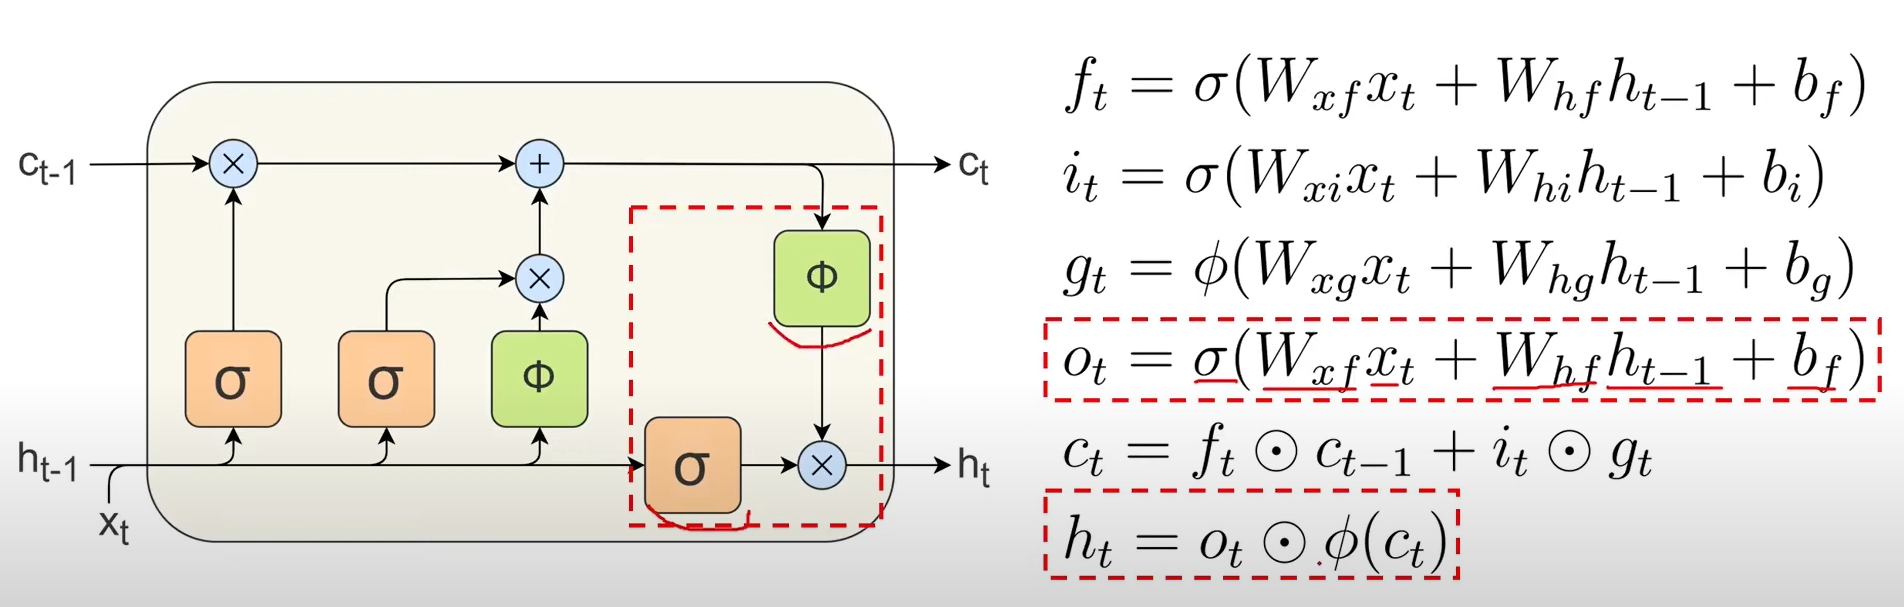


## GRU( Gate recurrent unit)

Unlike LSTMs, which have three gates (forget, input, and output), GRUs combine the forget and input gates into a single gate, making the architecture simpler and easier to train. Additionaly it has fewer parameters.

A GRU cell consists of two primary gates:

1. Update Gate:
 The update gate decides how much of the previous hidden state should be passed along to the current hidden state. It controls the degree to which the new information (from the current input) should be incorporated into the memory.
The update gate is similar to both the forget and input gates in an LSTM, but it's a single gate.

2. Reset Gate:
 The reset gate controls how much of the previous hidden state should be "forgotten" when calculating the current hidden state. It determines whether the model should remember or forget information from the past.
A low value of the reset gate causes the GRU to ignore the previous hidden state, while a high value allows it to retain the previous hidden state.


3. Current Hidden State:
 The current hidden state
ℎ
𝑡
h
t
​
  is calculated by blending the previous hidden state
ℎ
𝑡
−
1
h
t−1
​
  and a candidate hidden state
ℎ
~
𝑡
h
~
  t
​
 . The blending is controlled by the update gate
𝑧
𝑡
z
t
​
 .
The candidate hidden state
ℎ
~
𝑡
h
~
  t
is created based on the previous hidden state
ℎ
𝑡
−
1
h
t−1
​
  and the current input
𝑥
𝑡
x
t
​
 , modulated by the reset gate
𝑟
𝑡
r
t
​
 .


4. Final Hidden State:
The final hidden state
ℎ
𝑡
h
t
​
  is calculated as a weighted sum of the previous hidden state
ℎ
𝑡
−
1
h
t−1
​
  and the candidate hidden state
ℎ
~
𝑡
h
~
  t
​
 . The weighting is done using the update gate
𝑧
𝑡
z
t
​
 .
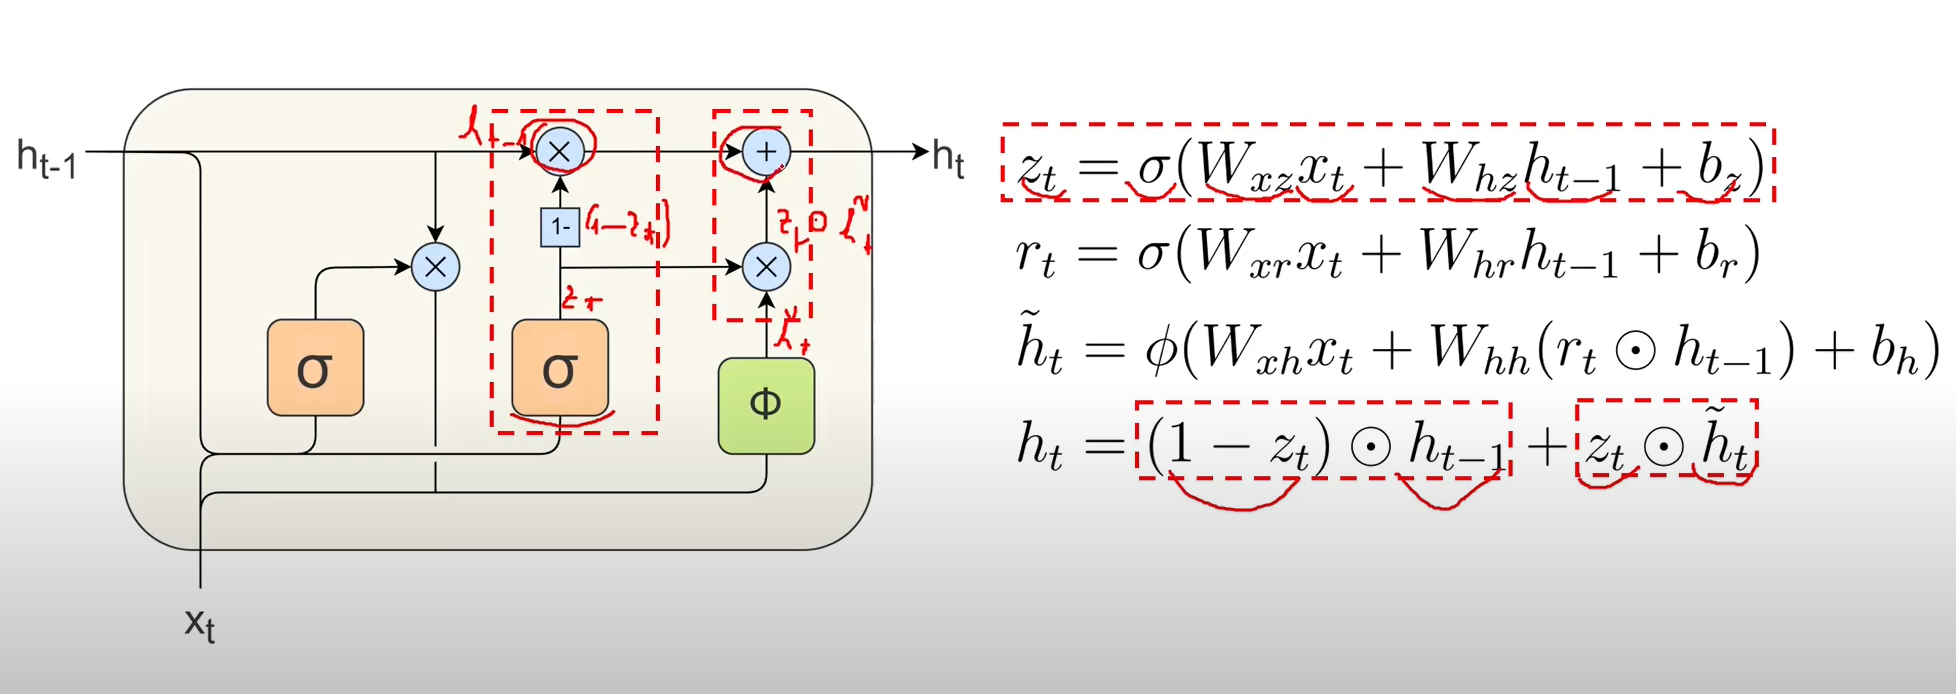



## Attention is all you need



```
# This is formatted as code

Beautifully explaiined here https://www.youtube.com/watch?v=wjZofJX0v4M&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=6
```

This explains it all

https://www.youtube.com/watch?v=iDulhoQ2pro

https://www.youtube.com/watch?v=bCz4OMemCcA



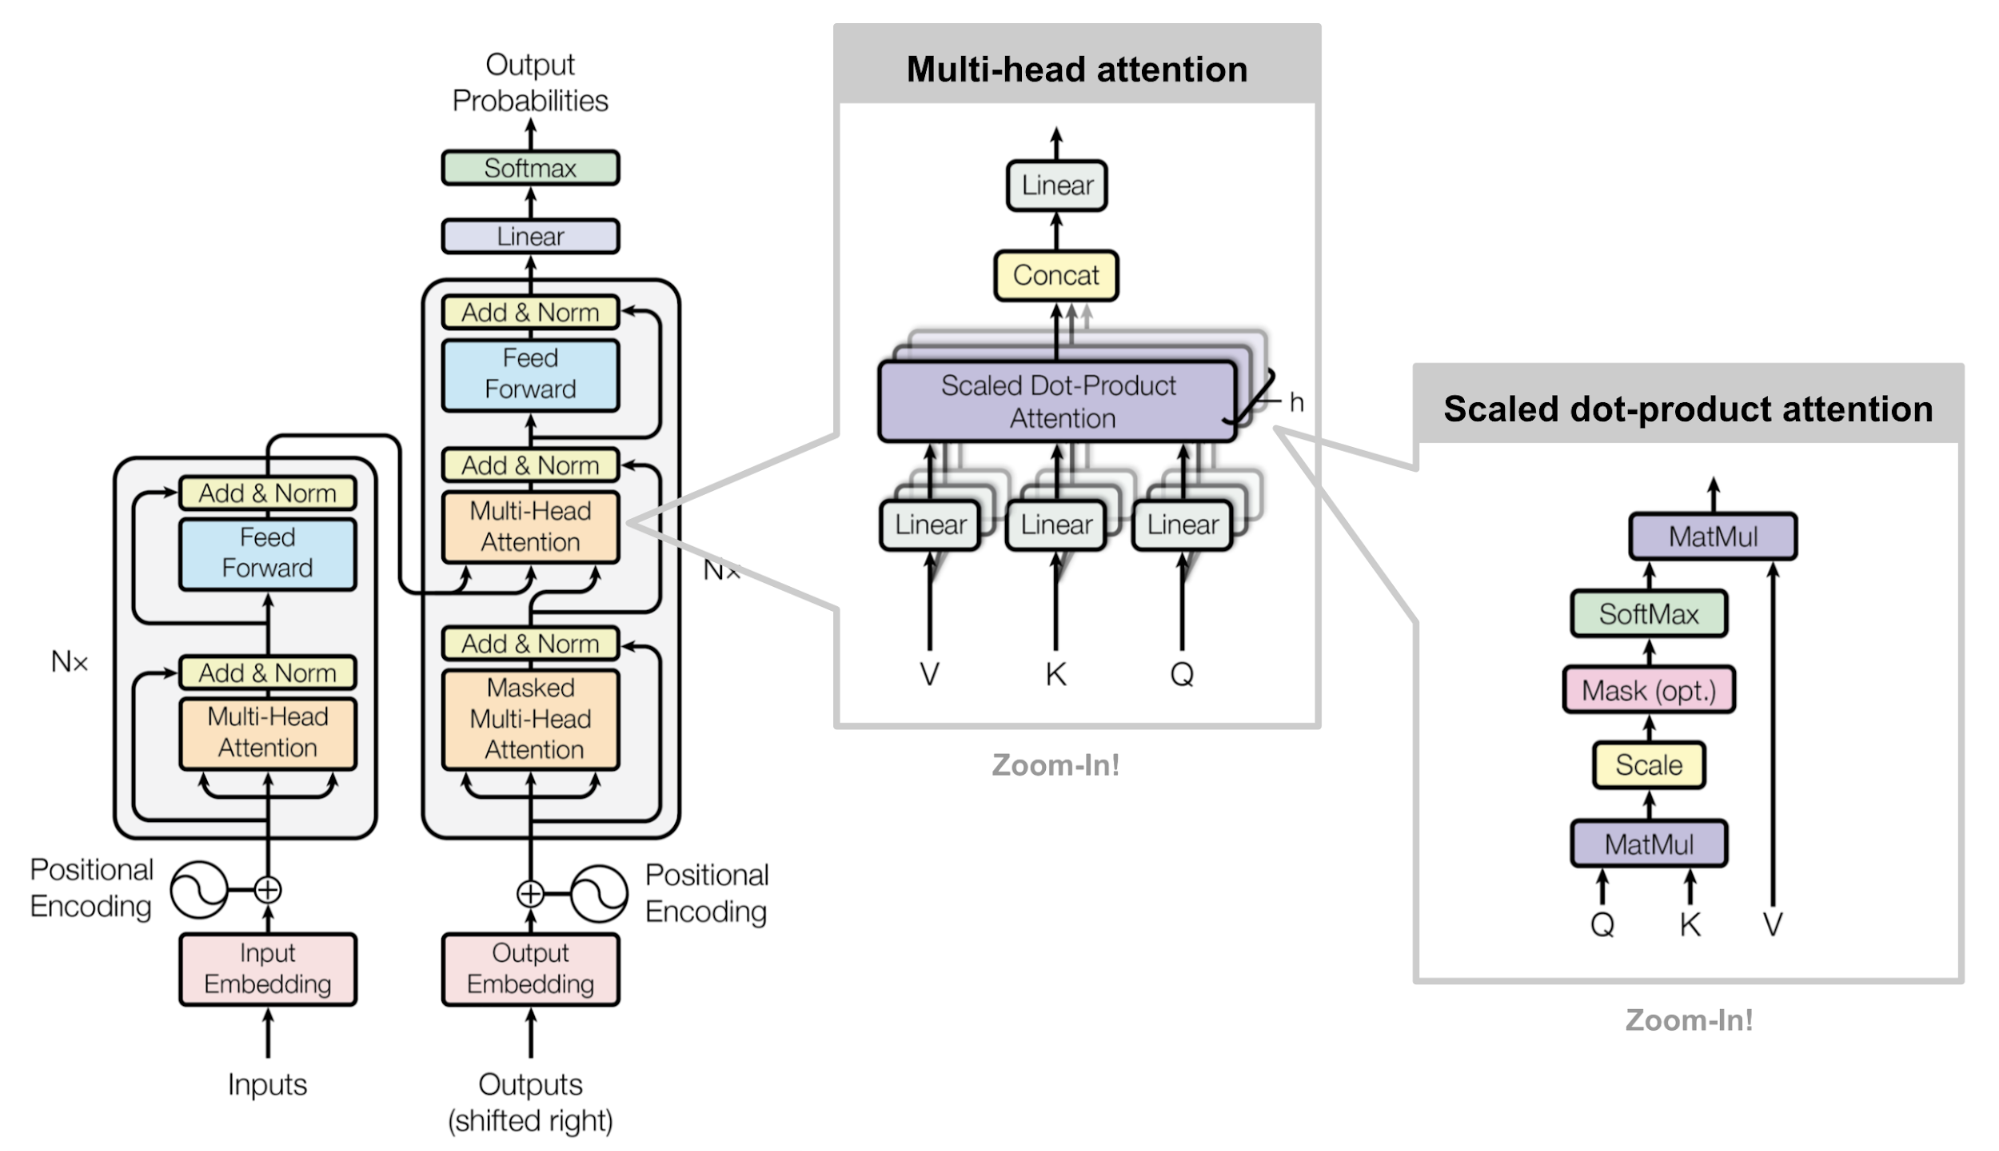


## Multi Layer perceptron

It is a fully connected feedforward network that can learn complex patterns using non-linear activation functions. MLP is widely used for classification and regression tasks.

## Visual Transformers (ViT)

https://www.youtube.com/watch?v=j3VNqtJUoz0

https://www.youtube.com/watch?v=SIkYp6dscLw

